# **DATA 311 UBCO, Principal Component Analysis implemented in Python**

## **Assignment 4, Advanced ML models:**

### **PCA Implementation:**

In [27]:
##decleration & data first as always

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import log_loss
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import plot_tree
# from sklearn.ensemble import BaggingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

df = pd.read_csv('Hitters.csv')
df.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


In [28]:
df = df.dropna()

df.describe() # df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


### **Lets use a 100 0 train test split for this one:**
**(because this is Analysis & not Classification/Regression)**

In [95]:
n = df.shape[0]
i = np.random.permutation(n)

train_size = round(1*n)
test_size = 0

train = i[:train_size]
test = i[:test_size]

training_data = df.iloc[train]
testing_data = df.iloc[test]

training_data.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

### **Now let's fit the model:**

    bare with the weird object oriented practice:
    
    first, use scaler = StandardScaler() to invoke the sci kit learn scalar method
    then we use scaled data by x_train_scaled = scaler.fit_transform(x_train)
    & now for the model: pca_model = PCA().fit(x_train_scaled)

In [96]:
x_train = pd.get_dummies(training_data.drop('Salary', axis=1))
y_train = training_data['Salary']

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
pca = PCA().fit(x_train_scaled)

# print(pca.explained_variance_ratio_)
# print(pca.explained_variance_)
# print(pca.get_covariance)
# print(pca.get_feature_names_out)
# print(pca.get_params)
# print(pca.get_precision)

### **& Gather info on what the model is doing:**

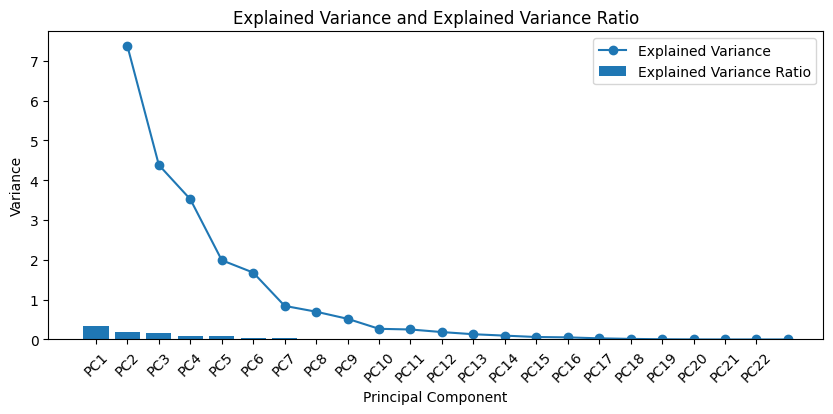

In [97]:
principal_component_names = [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))]

plt.figure(figsize=(10, 4))
plt.bar(principal_component_names, pca.explained_variance_ratio_, label='Explained Variance Ratio')
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='-', label='Explained Variance')
plt.xlabel('Principal Component');      plt.ylabel('Variance');     plt.title('Explained Variance and Explained Variance Ratio')
plt.xticks(rotation=45);        plt.legend();      plt.show()


### **Final step, explain how many PC add up to 80% variance:**

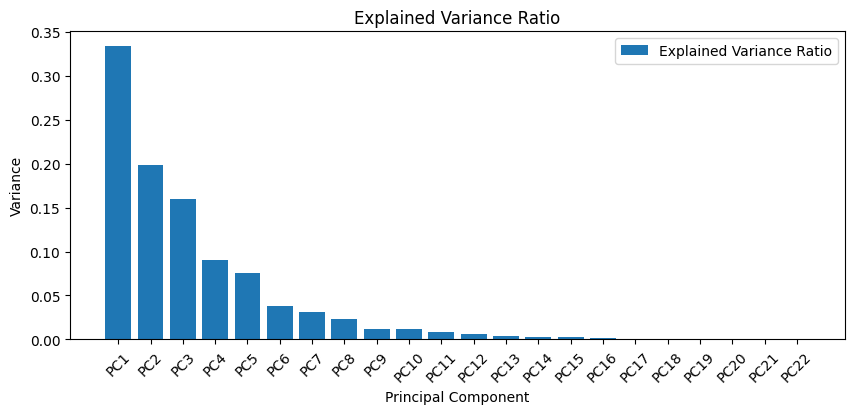

In [108]:
principal_component_names = [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))]
plt.figure(figsize=(10, 4)); plt.bar(principal_component_names, pca.explained_variance_ratio_, label='Explained Variance Ratio')
plt.xlabel('Principal Component'); plt.ylabel('Variance'); plt.title('Explained Variance Ratio'); plt.xticks(rotation=45); plt.legend(); plt.show()


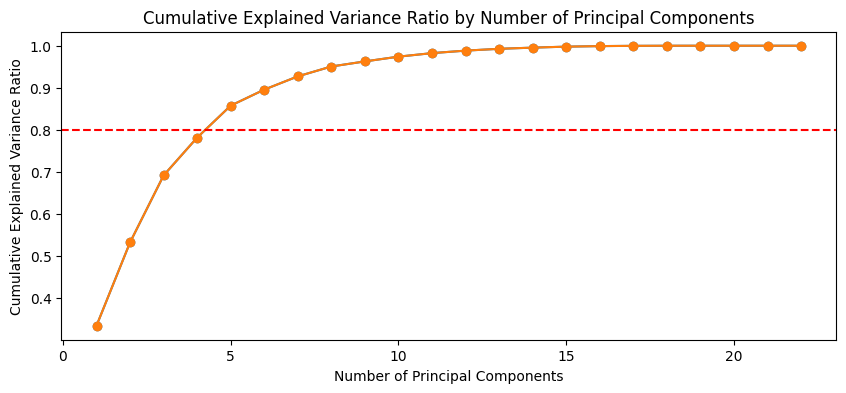

In [111]:
pcacumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 4)); plt.plot(range(1, len(pcacumsum) + 1), pcacumsum, marker='o', linestyle='-')
plt.plot(range(1, len(pcacumsum) + 1), pcacumsum, marker='o', linestyle='-'); plt.axhline(y=0.8, color='r', linestyle='--', label='80% Explained Variance')
plt.xlabel('Number of Principal Components'); plt.ylabel('Cumulative Explained Variance Ratio'); plt.title('Cumulative Explained Variance Ratio by Number of Principal Components'); plt.show()

there are 4 points under y=80%, so we would need 5 components to explain over 80% ov Variance

I know this notebook seemed short, this was because PCA is not being used as a model, but rather to measure Variance

### **Next Notebooks: Ridge/Lasso Regression & Neural Networks**